<a href="https://colab.research.google.com/github/abhinay-2006/AIML/blob/main/AIML_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [3]:
fetch_openml(data_id=5).keys
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2,parser='auto')
type(car_data)

sklearn.utils._bunch.Bunch

In [4]:
car_data.keys()
car_data.feature_names, car_data.target.value_counts()
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [9]:
car_data.columns
car_data = car_data
car_data.head()
type(car_data)

pandas.core.frame.DataFrame

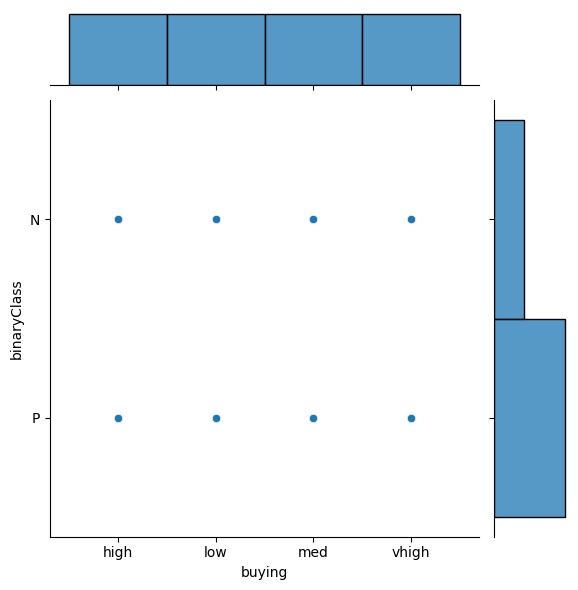

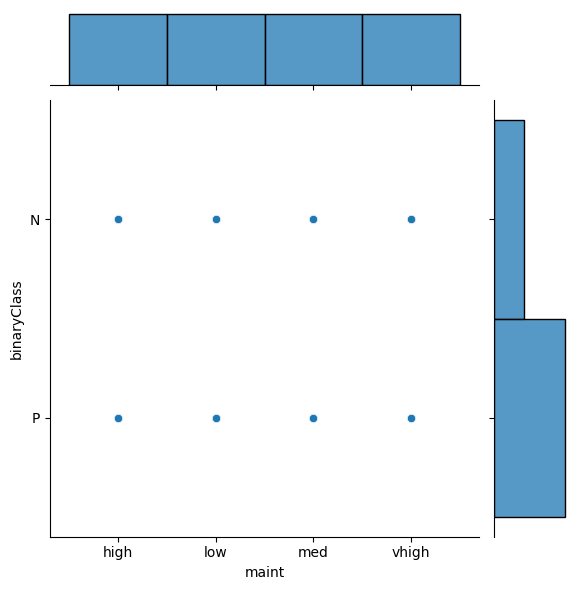

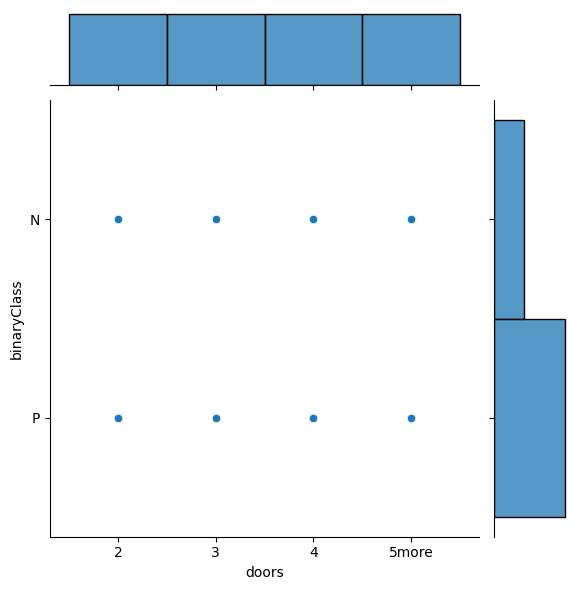

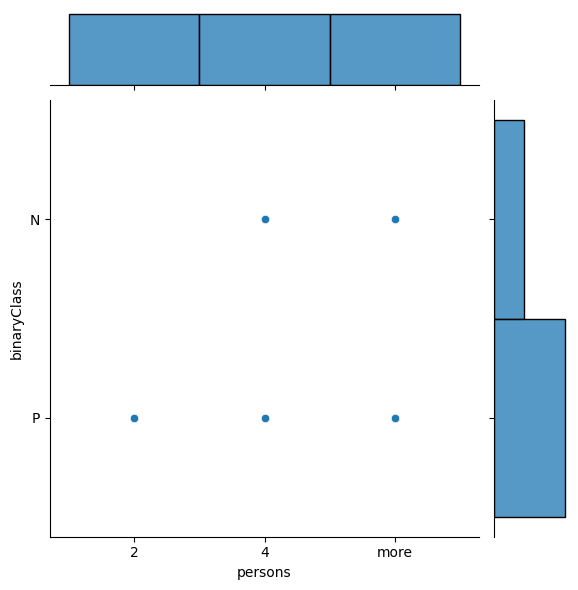

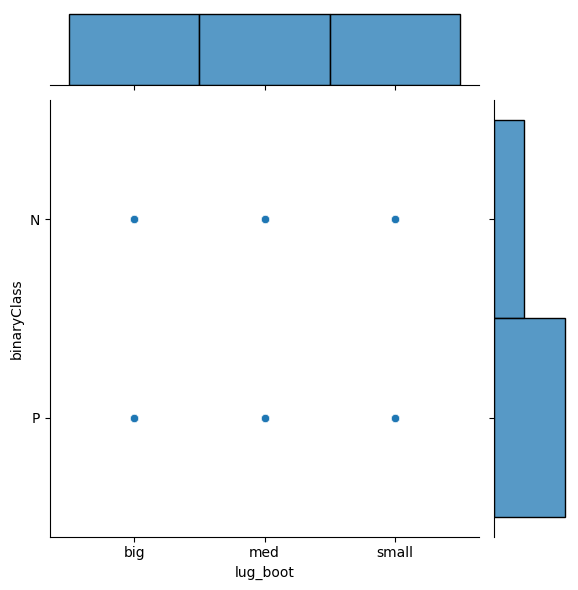

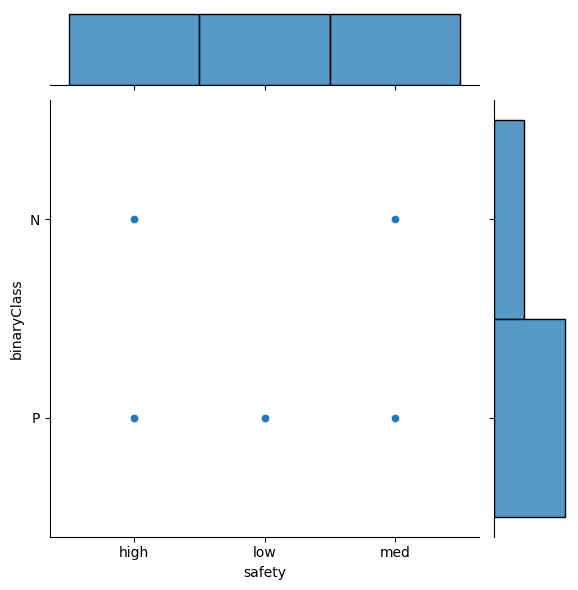

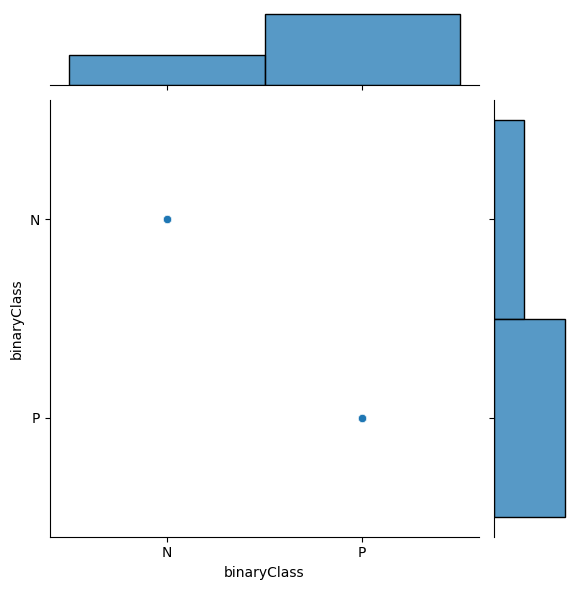

In [11]:
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',data=car_data,palette='rainbow')

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size=0.2,random_state=220)
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [13]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [14]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [19]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [20]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)
car_train_prepared.shape, car_labels_prepared.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((1382, 6), (1382,))

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

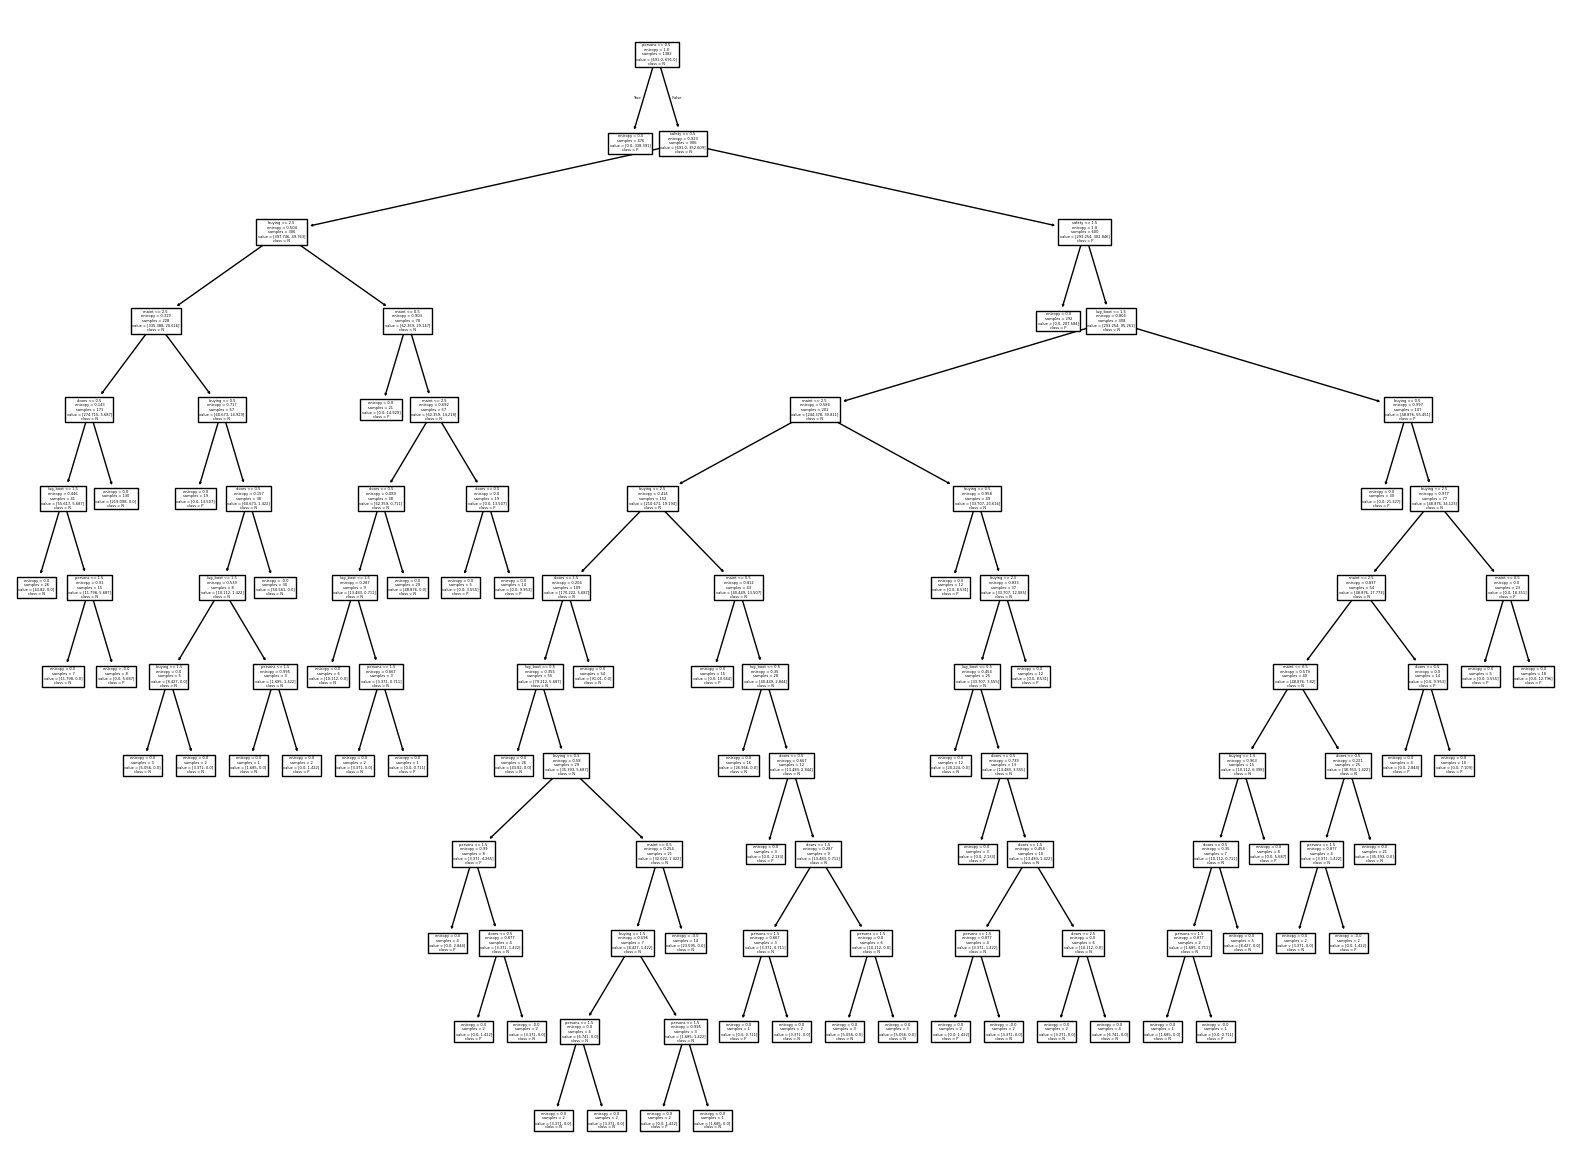

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,class_names=['N','P']);

In [27]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



In [26]:
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Confusion Matrix:[[410   0]
 [  0 972]]
